MODEL TRAINING

i) Imports

In [33]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_palette('husl')

print("Packages imported")

Packages imported


ii) Load processed dataset

In [34]:
print("===== LOADING PROCESSED DATASET =====")

dataset=pd.read_csv('../data/processed/processed_dataset.csv', index_col=0)
print(f"\nDataset Loaded. Shape: {dataset.shape} ")
print("\nFirst five rows: ")
display(dataset.head())
print("\nColumns and datatypes: ")
dataset.dtypes


===== LOADING PROCESSED DATASET =====

Dataset Loaded. Shape: (488903, 28) 

First five rows: 


,Fans:Electricity in kW (Hourly),Cooling:Electricity in kW (Hourly),Heating:Electricity in kW (Hourly),InteriorLights:Electricity in kW (Hourly),InteriorEquipment:Electricity in kW (Hourly),Gas:Facility in kW (Hourly),Heating:Gas in kW (Hourly),InteriorEquipment:Gas in kW (Hourly),Water Heater:WaterSystems:Gas in kW (Hourly),theft,theft_binary,Class_FullServiceRestaurant,Class_Hospital,Class_LargeHotel,Class_LargeOffice,Class_MediumOffice,Class_MidriseApartment,Class_OutPatient,Class_PrimarySchool,Class_QuickServiceRestaurant,Class_SecondarySchool,Class_SmallHotel,Class_SmallOffice,Class_Stand-aloneRetail,Class_StripMall,Class_SuperMarket,Class_Warehouse,area_id
Electricity:Facility in kW (Hourly),,,,,,,,,,,,,,,,,,,,,,,,,,,,
22.035977,3.586221,0.0,0.0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,Normal,Normal,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4
14.649757,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,Normal,Normal,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,5
14.669567,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,Normal,Normal,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3
14.677808,0.000000,0.0,0.0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,Normal,Normal,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,5
14.824794,0.000000,0.0,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,Normal,Normal,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,5



Columns and datatypes: 


Fans:Electricity in kW (Hourly)                 float64
Cooling:Electricity in kW (Hourly)              float64
Heating:Electricity in kW (Hourly)              float64
InteriorLights:Electricity in kW (Hourly)       float64
InteriorEquipment:Electricity in kW (Hourly)    float64
Gas:Facility in kW (Hourly)                     float64
Heating:Gas in kW (Hourly)                      float64
InteriorEquipment:Gas in kW (Hourly)            float64
Water Heater:WaterSystems:Gas in kW (Hourly)    float64
theft                                            object
theft_binary                                     object
Class_FullServiceRestaurant                        bool
Class_Hospital                                     bool
Class_LargeHotel                                   bool
Class_LargeOffice                                  bool
Class_MediumOffice                                 bool
Class_MidriseApartment                             bool
Class_OutPatient                                

iii) Defining Training Features (X) and Target Variable (y), Encoding Target Variable (y)

In [35]:
print("===== DEFINING TRAINING FEATURES (X) AND TARGET VARIABLE (y) =====")

train_feats=[col for col in dataset.columns if col not in ['theft', 'area_id', 'theft_binary']]
X=dataset[train_feats]


print("\nTraining Features (X): ")
print(X.dtypes)

from sklearn.preprocessing import LabelEncoder

print("\n===== ENCODING TARGET VARIABLE (y) =====")

target_var='theft_binary'
y=dataset[target_var]

#convert target to binary
le=LabelEncoder()
y=le.fit_transform(y)



print(f"\nTarget Variable (y): {target_var}")
print(f"Target Variable (y) encoded: {le.classes_} becomes [0 1]")
print(f"\nData type of y: {type(y[0])}")
print(f"Actual y values after encoding (first 10): {y[:10]}")
print(f"\nTarget Distribution after encoding: ")
print(f"   0 (Normal):\t{(y==0).sum()} ({(y==0).sum()/len(y)*100:.2f}%)")
print(f"   1 (Theft):\t{(y==1).sum()} ({(y==1).sum()/len(y)*100:.2f}%)")



===== DEFINING TRAINING FEATURES (X) AND TARGET VARIABLE (y) =====

Training Features (X): 
Fans:Electricity in kW (Hourly)                 float64
Cooling:Electricity in kW (Hourly)              float64
Heating:Electricity in kW (Hourly)              float64
InteriorLights:Electricity in kW (Hourly)       float64
InteriorEquipment:Electricity in kW (Hourly)    float64
Gas:Facility in kW (Hourly)                     float64
Heating:Gas in kW (Hourly)                      float64
InteriorEquipment:Gas in kW (Hourly)            float64
Water Heater:WaterSystems:Gas in kW (Hourly)    float64
Class_FullServiceRestaurant                        bool
Class_Hospital                                     bool
Class_LargeHotel                                   bool
Class_LargeOffice                                  bool
Class_MediumOffice                                 bool
Class_MidriseApartment                             bool
Class_OutPatient                                   bool
Class_Primar

iv) Train/Test Split (Cross Validation Method)

In [36]:
from sklearn.model_selection import train_test_split

print("===== TRAIN/TEST SPLIT (80/20) =====")

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} samples ({(X_train.shape[0]/len(X)*100):.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({(X_test.shape[0]/len(X)*100):.1f}%)")

print(f"\nClass distribution in training set: ")
print(f"    0 (Normal): {(y_train==0).sum()} ({(y_train==0).sum()/len(y_train)*100:.2f}%)")
print(f"    1 (Theft): {(y_train==1).sum()} ({(y_train==1).sum()/len(y_train)*100:.2f}%)")

print(f"\nClass distribution in testing set: ")
print(f"    0 (Normal): {(y_test==0).sum()} ({(y_test==0).sum()/len(y_test)*100:.2f}%)")
print(f"    1 (Theft): {(y_test==1).sum()} ({(y_test==1).sum()/len(y_test)*100:.2f}%)")

print("\nTest set will not be touched until final evaluation!")


===== TRAIN/TEST SPLIT (80/20) =====

Training set size: 391122 samples (80.0%)
Testing set size: 97781 samples (20.0%)

Class distribution in training set: 
    0 (Normal): 225634 (57.69%)
    1 (Theft): 165488 (42.31%)

Class distribution in testing set: 
    0 (Normal): 56409 (57.69%)
    1 (Theft): 41372 (42.31%)

Test set will not be touched until final evaluation!


v) Initialize models

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

print("===== INITIALIZE MODELS =====")

models={

    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss', use_label_encoder=False),
    #'SVM': SVC(random_state=42, probability=True),
    #'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()

}

print(f"\nTotal models to evaluate: {len(models)}")
for name in models.keys():
    print(f" - {name}")



===== INITIALIZE MODELS =====

Total models to evaluate: 6
 - Logistic Regression
 - Decision Tree
 - Random Forest
 - GradientBoostingClassifier
 - XGBoost
 - Naive Bayes


vi) Cross Validation Loop on Training Set

In [38]:
# Out of the 80% of training data, we split it into five folds of 20% each
# Then each fold takes turns in a loop to act as the validation set within training

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

print("===== CROSS-VALIDATION (5-FOLD) ON TRAINING SET =====")

scoring={
    'accuracy':  make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

cv_results={}

for name, model in models.items():
    print(f"\n===== Training: {name} =====")

    start_time=time.time()

    scores=cross_validate(
        model,
        X_train,
        y_train,
        cv=5,
        scoring=scoring,
        n_jobs=-1,
        verbose=0,
        return_train_score=True
    )

    end_time=time.time()
    total_time=end_time-start_time

    cv_results[name]={

        #training metrics (80% each fold)
        'train_accuracy': scores['train_accuracy'].mean(),
        'train_precision': scores['train_precision'].mean(),
        'train_recall': scores['train_recall'].mean(),
        'train_f1': scores['train_f1'].mean(),
        'train_roc_auc': scores['train_roc_auc'].mean(),
        

        #cross-validation metrics (20% each fold)
        'test_accuracy': scores['test_accuracy'].mean(),
        'test_precision': scores['test_precision'].mean(),
        'test_recall': scores['test_recall'].mean(),
        'test_f1': scores['test_f1'].mean(),
        'test_roc_auc': scores['test_roc_auc'].mean(),


        #total time taken
        'total_training_time': total_time
        
    }

    #display metrics

    print(f"\nCompleted in {total_time:.2f} seconds")

    print(f"\nTraining Accuracy: {cv_results[name]['train_accuracy']*100:.4f}%")
    print(f"CV Accuracy: {cv_results[name]['test_accuracy']*100:.4f}%")

    print(f"\nTraining Precision: {cv_results[name]['train_precision']*100:.4f}%")
    print(f"CV Precision: {cv_results[name]['test_precision']*100:.4f}%")

    print(f"\nTraining Recall: {cv_results[name]['train_recall']*100:.4f}%")
    print(f"CV Recall: {cv_results[name]['test_recall']*100:.4f}%")

    print(f"\nTraining F1 Score: {cv_results[name]['train_f1']*100:.4f}%")
    print(f"CV F1 Score: {cv_results[name]['test_f1']*100:.4f}%")

    print(f"\nTraining ROC-AUC: {cv_results[name]['train_roc_auc']*100:.4f}%")
    print(f"CV ROC-AUC: {cv_results[name]['test_roc_auc']*100:.4f}%")

   

print("\n===== TRAINING & CROSS VALIDATION COMPLETE! =====")





===== CROSS-VALIDATION (5-FOLD) ON TRAINING SET =====

===== Training: Logistic Regression =====


KeyboardInterrupt: 

vii) Top models

In [ ]:
print("===== MODEL RANKING =====\n")

sorted_models=sorted(cv_results.items(), key=lambda x: x[1]['test_f1'], reverse=True)


print("Rank | Model                      | CV Precision | CV Recall | CV F1 Score")
print("-" * 80)

for rank, (name, results) in enumerate(sorted_models, 1):
    print(f"{rank:>4} | {name:<26} | {results['test_accuracy']*100:>10.2f}% | {results['test_precision']*100:>10.2f}% | {results['test_recall']*100:>9.2f}%")

print(f"\nTop three models: ")
for i in range(3):
    print(f"{i+1}. {sorted_models[i][0]}")

print(f"\n===== DETAILED METRICS OF TOP 3 MODELS =====")
for rank, (name, results) in enumerate(sorted_models[:3], 1):
    print(f"\n{rank}. {name}")
    print(f" - Accuracy: {results['test_accuracy']*100:.4f}%")
    print(f" - Precision: {results['test_precision']*100:.4f}%")
    print(f" - Recall: {results['test_recall']*100:.4f}%")
    print(f" - F1 Score: {results['test_f1']*100:.4f}%")
    print(f" - ROC-AUC: {results['test_roc_auc']*100:.4f}%")
    print(f" - Time: {results['total_training_time']:.2f}s")

===== MODEL RANKING =====

Rank | Model                      | CV Precision | CV Recall | CV F1 Score
--------------------------------------------------------------------------------
   1 | Random Forest              |      99.56% |      99.83% |     99.14%
   2 | XGBoost                    |      99.52% |      99.92% |     98.95%
   3 | Decision Tree              |      99.25% |      99.16% |     99.08%
   4 | GradientBoostingClassifier |      93.70% |      97.17% |     87.66%
   5 | Logistic Regression        |      73.86% |      73.58% |     59.63%
   6 | Naive Bayes                |      53.40% |      47.30% |     88.86%

Top three models: 
1. Random Forest
2. XGBoost
3. Decision Tree

===== DETAILED METRICS OF TOP 3 MODELS =====

1. Random Forest
 - Accuracy: 99.5615%
 - Precision: 99.8254%
 - Recall: 99.1371%
 - F1 Score: 99.4800%
 - ROC-AUC: 99.5050%
 - Time: 76.97s

2. XGBoost
 - Accuracy: 99.5196%
 - Precision: 99.9182%
 - Recall: 98.9455%
 - F1 Score: 99.4295%
 - ROC-AUC: 99.

viii) Final Test Set Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

print("===== FINAL TEST SET EVALUATION - TOP 3 MODELS =====")

models_to_test={
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': xgb.XGBClassifier(n_estimators=100,random_state=42, eval_metric='logloss'),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

test_results={}

for name, model in models_to_test.items():
    print(f"\n{'='*10} MODEL: {name} {'='*10}")
    print("\nTraining...")
    model.fit(X_train, y_train)

    y_pred=model.predict(X_test)
    y_pred_proba=model.predict_proba(X_test)[:,1]

    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)
    roc_auc=roc_auc_score(y_test, y_pred_proba)

    test_results[name]={
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

    print(f"\n{'-'*10} Test Set Performance {'-'*10}")
    print(f"Accuracy: {accuracy*100:.4f}%")
    print(f"Precision: {precision*100:.4f}%")
    print(f"Recall: {recall*100:.4f}%")
    print(f"F1 Score: {f1*100:.4f}")
    print(f"ROC-AUC: {roc_auc*100:.4f}%")

    cm=confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp=cm.ravel()


    print(f"\n{'-'*10} Confusion Matrix {'-'*10}")
    print(f"True Negatives: {tn:,} (Normal Correctly identified)")
    print(f"False Positives: {fp:,} (Normal flagged as Theft)")
    print(f"False Negatives: {fn:,} (Theft missed)")
    print(f"True Positives: {tp:,} (Thefts correctly caught)")

    print(f"\nMissing {fn:,} out of {(y_test==1).sum():,} total thefts ({fn/(y_test==1).sum()*100:.2f}%)")
    print(f"False Alarms: {fn:,} out of {(y_test==0).sum()} total normal cases ({fp/(y_test==0).sum()*100:.2f}%)")


print(f"\n{'='*10} FINAL COMPARISON {'='*10}\n")
print(f"{'Model':<20} | {'Accuracy':>11} | {'Precision':>11} | {'Recall':>11} | {'F1':>11} | {'ROC-AUC':>11}")
print('-'*90)
for name, results in test_results.items():
    print(f"{name:<20} | {results['accuracy']*100:>10.2f}% | {results['precision']*100:>10.2f}% | {results['recall']*100:>10.2f}% | {results['f1']*100:>10.2f}% | {results['roc_auc']*100:>10.2f}%")


best_model=max(test_results.items(), key=lambda x: x[1]['f1'])
print(f"\nBEST MODEL BY F1 SCORE: {best_model[0]}")
print(f"-> F1 Score: {best_model[1]['f1']*100:.4f}%")



===== FINAL TEST SET EVALUATION - TOP 3 MODELS =====

========== MODEL: Random Forest ==========

Training...

---------- Test Set Performance ----------
Accuracy: 99.6083%
Precision: 99.8395%
Recall: 99.2338%
F1 Score: 99.5357
ROC-AUC: 99.7821%

---------- Confusion Matrix ----------
True Negatives: 56,343 (Normal Correctly identified)
False Positives: 66 (Normal flagged as Theft)
False Negatives: 317 (Theft missed)
True Positives: 41,055 (Thefts correctly caught)

Missing 317 out of 41,372 total thefts (0.77%)
False Alarms: 317 out of 56409 total normal cases (0.12%)

========== MODEL: XGBoost ==========

Training...

---------- Test Set Performance ----------
Accuracy: 99.5715%
Precision: 99.9098%
Recall: 99.0767%
F1 Score: 99.4915
ROC-AUC: 99.8045%

---------- Confusion Matrix ----------
True Negatives: 56,372 (Normal Correctly identified)
False Positives: 37 (Normal flagged as Theft)
False Negatives: 382 (Theft missed)
True Positives: 40,990 (Thefts correctly caught)

Missing 382 

ix) Visualizations and Graphs for Top Models

ix-i) Confusion Matrix


----- 1) Confusion Matrix for Random Forest -----
True Negatives: 56,343 (Normal Correctly identified)
False Positives: 66 (Normal flagged as Theft)
False Negatives: 317 (Theft missed)
True Positives: 41,055 (Thefts correctly caught)


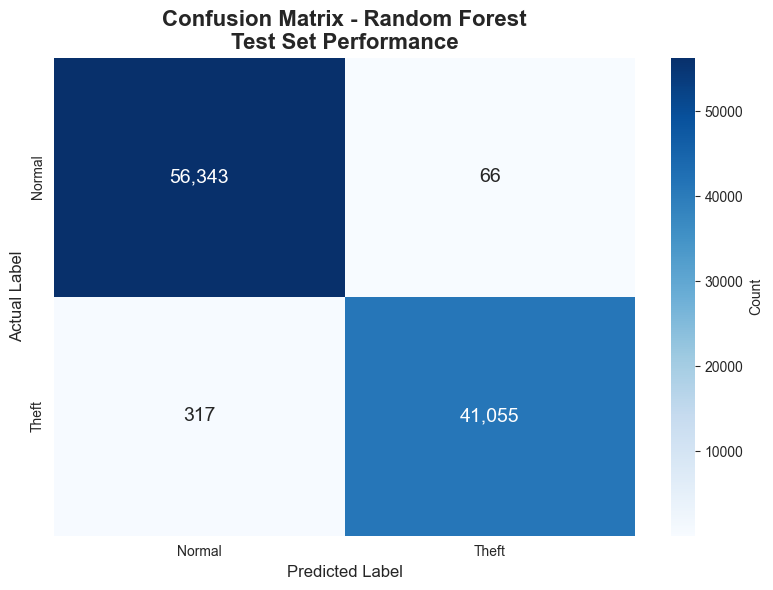

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize']=(12,8)


# =============================== CONFUSION MATRIX ===============================


rf_results=test_results[best_model[0]]
y_pred_rf=rf_results['y_pred']
y_pred_proba_rf=rf_results['y_pred_proba']

print(f"\n----- 1) Confusion Matrix for {best_model[0]} -----")

fig,ax=plt.subplots(figsize=(8,6))
cm=confusion_matrix(y_test,y_pred_rf)

tn,fp,fn,tp=cm.ravel()

print(f"True Negatives: {tn:,} (Normal Correctly identified)")
print(f"False Positives: {fp:,} (Normal flagged as Theft)")
print(f"False Negatives: {fn:,} (Theft missed)")
print(f"True Positives: {tp:,} (Thefts correctly caught)")

sns.heatmap(
    cm, 
    annot=True, 
    fmt=',d', 
    cmap="Blues",
    xticklabels=['Normal', 'Theft'],
    yticklabels=['Normal', 'Theft'],
    cbar_kws={'label':'Count'},
    annot_kws={'size': 14}
)

plt.title(f'Confusion Matrix - Random Forest\nTest Set Performance', fontsize=16, fontweight='bold')
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('../visualizations/metrics/confusion_matrix.png', dpi=3000, bbox_inches='tight')
plt.show()




ix-ii) ROC-AUC Curve


----- 2) ROC-AUC Curves for Top 3 Models -----


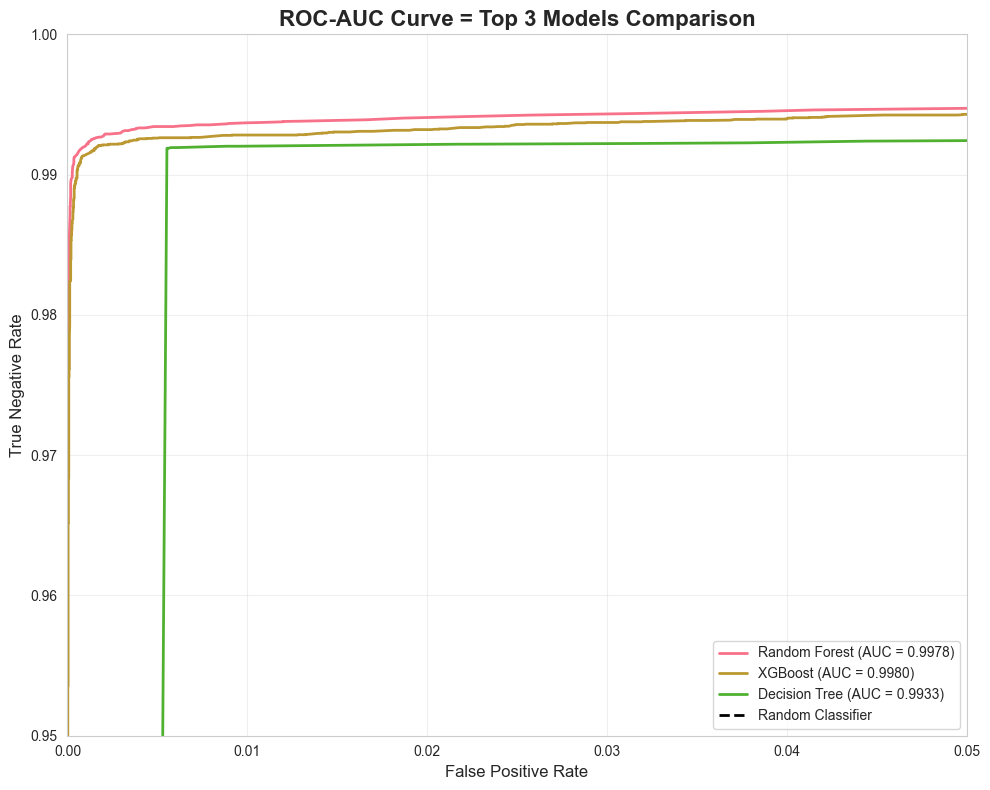

In [ ]:
# =============================== ROC-AUC CURVES ===============================


print("\n----- 2) ROC-AUC Curves for Top 3 Models -----")

fig,ax=plt.subplots(figsize=(10,8))


for name, results in test_results.items():
    fpr, tpr, _ =roc_curve(y_test, results['y_pred_proba'])

    auc_score=results['roc_auc']
    plt.plot(fpr, tpr, linewidth=2, label=f"{name} (AUC = {auc_score:.4f})")

plt.plot([0,1], [0,1], 'k--', linewidth=2, label='Random Classifier')
plt.xlim([0, 0.05]) #5% of false positives
plt.ylim([0.95,1.0]) #5% of true negatives
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Negative Rate', fontsize=12)
plt.title('ROC-AUC Curve = Top 3 Models Comparison', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../visualizations/metrics/roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()


ix-iii) Metrics Comparison Bar Chart


----- 3) Model Comparison Bar Chart for Top 3 Models -----


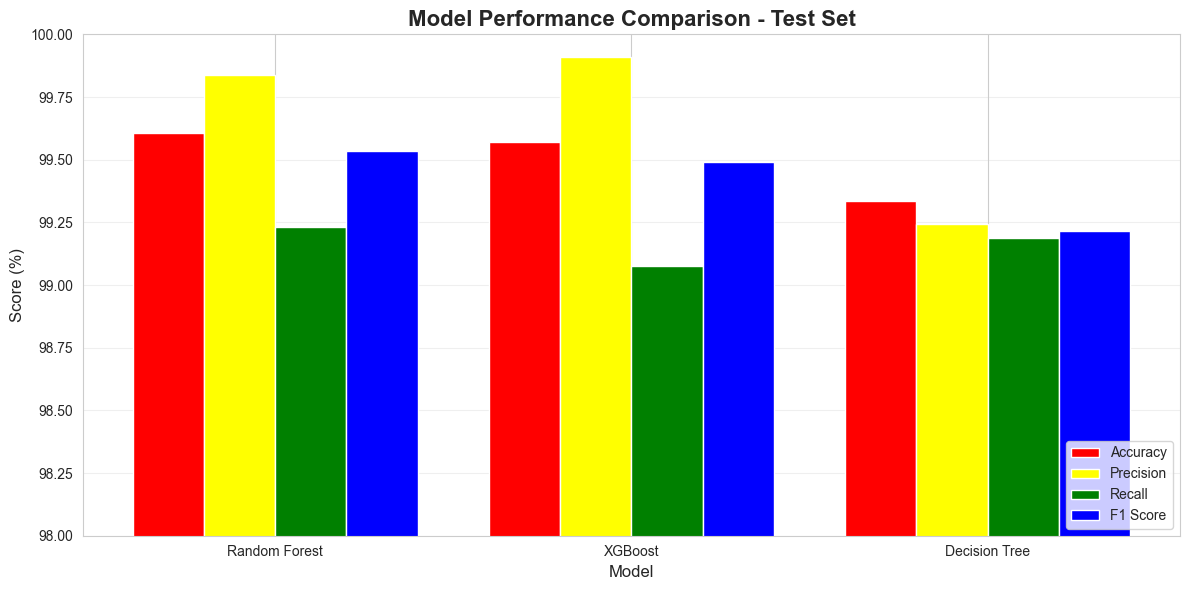

In [ ]:

# =============================== MODEL COMPARISON BAR CHART ===============================

print("\n----- 3) Model Comparison Bar Chart for Top 3 Models -----")

metrics_df=pd.DataFrame({
    'Model': list(test_results.keys()),
    'Accuracy': [r['accuracy']*100 for r in test_results.values()],
    'Precision': [r['precision']*100 for r in test_results.values()],
    'Recall': [r['recall']*100 for r in test_results.values()],
    'F1 Score': [r['f1']*100 for r in test_results.values()]
})

fig, ax=plt.subplots(figsize=(12,6))
x=np.arange(len(metrics_df))
width=0.2

plt.bar(x-1.5*width, metrics_df['Accuracy'], width, label='Accuracy', color='red')
plt.bar(x-0.5*width, metrics_df['Precision'], width, label='Precision', color='yellow')
plt.bar(x+0.5*width, metrics_df['Recall'], width, label='Recall', color='green')
plt.bar(x+1.5*width, metrics_df['F1 Score'], width, label='F1 Score', color='blue')

plt.xlabel('Model', fontsize=12)
plt.ylabel('Score (%)', fontsize=12)
plt.title('Model Performance Comparison - Test Set', fontsize=16, fontweight='bold')
plt.xticks(x, metrics_df['Model'])
plt.ylim([98,100])
plt.legend(loc='lower right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../visualizations/metrics/comparison_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()



ix-iv) Feature Importance Visualization for Top Model

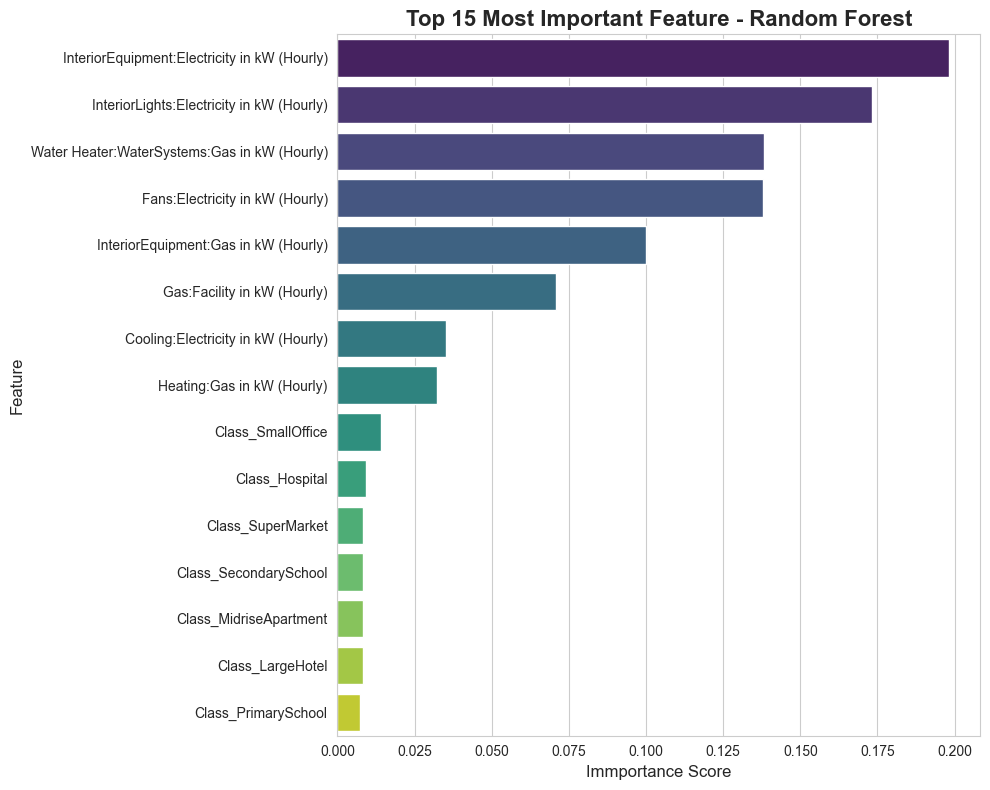

In [ ]:
# =============================== FEATURE IMPORTANCE VISUALIZATION ===============================

#Train top model specifically for feature importance extraction

top_model=models[best_model[0]]

top_model.fit(X_train, y_train)

feature_importance=pd.DataFrame({
    'feature': X_train.columns,
    'importance': top_model.feature_importances_
}).sort_values('importance', ascending=False)

fig, ax=plt.subplots(figsize=(10,8))
top_features=feature_importance.head(15)


sns.barplot(data=top_features, y='feature', x='importance', hue='feature', palette='viridis', legend=False)
plt.title(f'Top 15 Most Important Feature - {best_model[0]}', fontsize=16, fontweight='bold')
plt.xlabel('Immportance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('../visualizations/metrics/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

ix-v) Model Comparison Table on Test Set

===== MODEL COMPARISON TABLE FOR TEST SET PERFORMANCE =====

        Model Accuracy Precision Recall F1-Score ROC-AUC
Random Forest    99.61     99.84  99.23    99.54   99.78
      XGBoost    99.57     99.91  99.08    99.49   99.80
Decision Tree    99.34     99.25  99.19    99.22   99.33


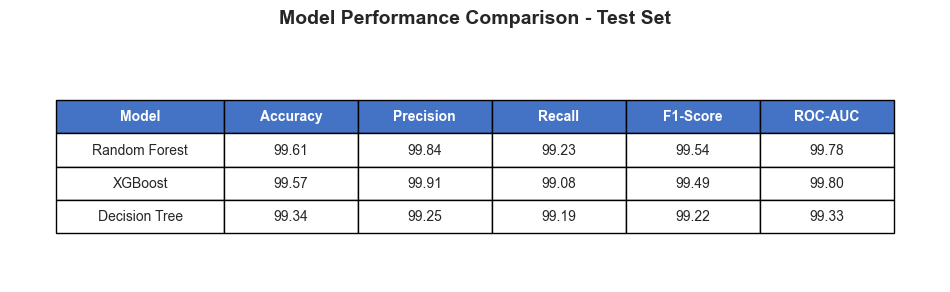

In [ ]:
# =============================== MODEL COMPARISON TABLE ON TEST SET ===============================

comparison_data={
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC-AUC': []
}

for name, results in test_results.items():
   comparison_data['Model'].append(name)
   comparison_data['Accuracy'].append(f"{results['accuracy']*100:.2f}%")
   comparison_data['Precision'].append(f"{results['precision']*100:.2f}%")
   comparison_data['Recall'].append(f"{results['recall']*100:.2f}%")
   comparison_data['F1-Score'].append(f"{results['f1']*100:.2f}%")
   comparison_data['ROC-AUC'].append(f"{results['roc_auc']*100:.2f}%")

comparison_df=pd.DataFrame(comparison_data)

print(f"===== MODEL COMPARISON TABLE FOR TEST SET PERFORMANCE =====\n")
print(comparison_df.to_string(index=False))

fig,ax=plt.subplots(figsize=(12,3))
ax.axis('tight')
ax.axis('off')
table=ax.table(
   cellText=comparison_df.values,
   colLabels=comparison_df.columns,
   cellLoc='center',
   loc='center',
   colWidths=[0.15,0.12,0.12,0.12,0.12,0.12]
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2,2)

#formatting for display
for i in range(len(comparison_df.columns)):
   table[(0,i)].set_facecolor('#4472C4')
   table[(0,i)].set_text_props(weight='bold', color='white')

plt.title('Model Performance Comparison - Test Set', fontsize=14, weight='bold', pad=20)
plt.savefig('../visualizations/metrics/model_comparison_table.png', bbox_inches='tight', dpi=300)


ix-vi) Top Model Classification Report on Test Set

RANDOM FOREST - DETAILED CLASSIFICATION REPORT ON TEST SET
{'Normal': {'precision': 0.994405224144017, 'recall': 0.9988299739403287, 'f1-score': 0.9966126878277866, 'support': 56409.0}, 'Theft': {'precision': 0.9983949806668125, 'recall': 0.9923378130136324, 'f1-score': 0.9953571818214879, 'support': 41372.0}, 'accuracy': 0.9960830836256532, 'macro avg': {'precision': 0.9964001024054148, 'recall': 0.9955838934769805, 'f1-score': 0.9959849348246372, 'support': 97781.0}, 'weighted avg': {'precision': 0.9960933251744942, 'recall': 0.9960830836256532, 'f1-score': 0.9960814722082635, 'support': 97781.0}}


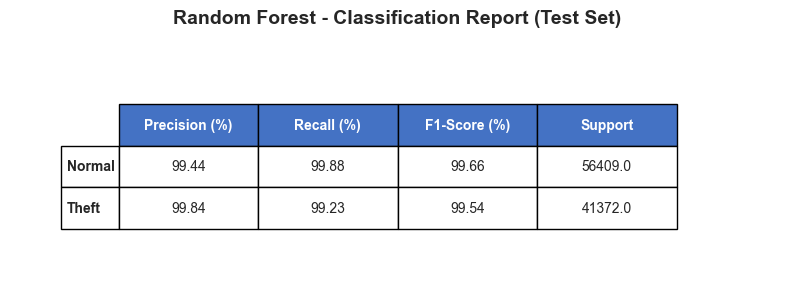

In [ ]:
from sklearn.metrics import classification_report

# =============================== TOP MODEL CLASSIFICATION REPORT ON TEST SET ===============================

print(f'{best_model[0].upper()} - DETAILED CLASSIFICATION REPORT ON TEST SET')

report=classification_report(
    y_test,
    y_pred_rf, 
    target_names=['Normal', 'Theft'],
    output_dict=True
)
print(report)
report_df=pd.DataFrame(report).transpose()
report_df[['precision', 'recall', 'f1-score']]=report_df[['precision','recall','f1-score']].round(4)*100
report_df=report_df.drop(['accuracy','macro avg', 'weighted avg']) # drop unimportant metrics

fig,ax=plt.subplots(figsize=(10,3))
ax.axis('tight')
ax.axis('off')

#formatting for display
display_data=report_df[['precision', 'recall', 'f1-score','support']].copy()
display_data['support']=display_data['support'].astype(int)
display_data[['precision', 'recall', 'f1-score']]=display_data[['precision','recall','f1-score']].round(2)

table2=ax.table(
    cellText=display_data.values,
    rowLabels=display_data.index,
    colLabels=['Precision (%)', 'Recall (%)', 'F1-Score (%)', 'Support'],
    cellLoc='center',
    loc='center',
    colWidths=[0.15,0.15,0.15,0.15]
)

table2.auto_set_font_size(False)
table2.set_fontsize(10)
table2.scale(1.2,2.5)

for i in range(4):
    table2[(0,i)].set_facecolor('#4472C4')
    table2[(0,i)].set_text_props(weight='bold', color='white')

for i in range(len(display_data)):
    table2[(i+1,-1)].set_facecolor('white')
    table2[(i+1,-1)].set_text_props(weight='bold')

plt.title(f'{best_model[0]} - Classification Report (Test Set)', fontsize=14, weight='bold', pad=20)
plt.savefig('../visualizations/metrics/rf_model_classification_report.png', bbox_inches='tight', dpi=300)

x) Storing feature names for API calls

In [46]:
import joblib
import json

#the order of features must be the exact same so it's better to save them
print(f"====== STORING FEATURE NAMES FOR API CALLS =====")

feature_columns=list(X_train.columns)
with open('../data/models/feature_columns.json', 'w') as f:
    json.dump(feature_columns, f)

print(f"Saved {len(feature_columns)} feature column names for easy calling through API")




====== STORING FEATURE NAMES FOR API CALLS =====
Saved 25 feature column names for easy calling through API


xi) Saving the model

In [ ]:
print(f"===== SAVING THE {best_model[0].upper()} MODEL")

joblib.dump(rf_model, f'../data/models/{'_'.join(best_model[0].lower().split())}_energy_theft.pkl')

print(f"{best_model[0]} model saved successfully!")


===== SAVING THE RANDOM FOREST MODEL
Random Forest model saved successfully!
